--- WILL RELATIONAL GEOMETRY: CMB ACOUSTIC SPECTRUM ANALYSIS ---
Vacuum Tension (Omega_pot): 0.6667
Baryonic Load  (Omega_b):   0.0482
Unloaded Resonance (l_vac): 228.39
------------------------------------------------------------
             Peak       Phase    Geometry        Loading  WILL RG Prediction  Planck 2018 Obs  Deviation (%)
       l1 (Fund.) Compression S2 (Bessel)  Sym (Pot+Mat)              220.55           220.60          -0.02
l2 (1st Overtone) Rarefaction S2 (Bessel) Asym (Pot-Mat)              544.32           537.50           1.27
l3 (2nd Overtone) Compression S2 (Bessel)  Sym (Pot+Mat)              793.66           810.80          -2.11
------------------------------------------------------------


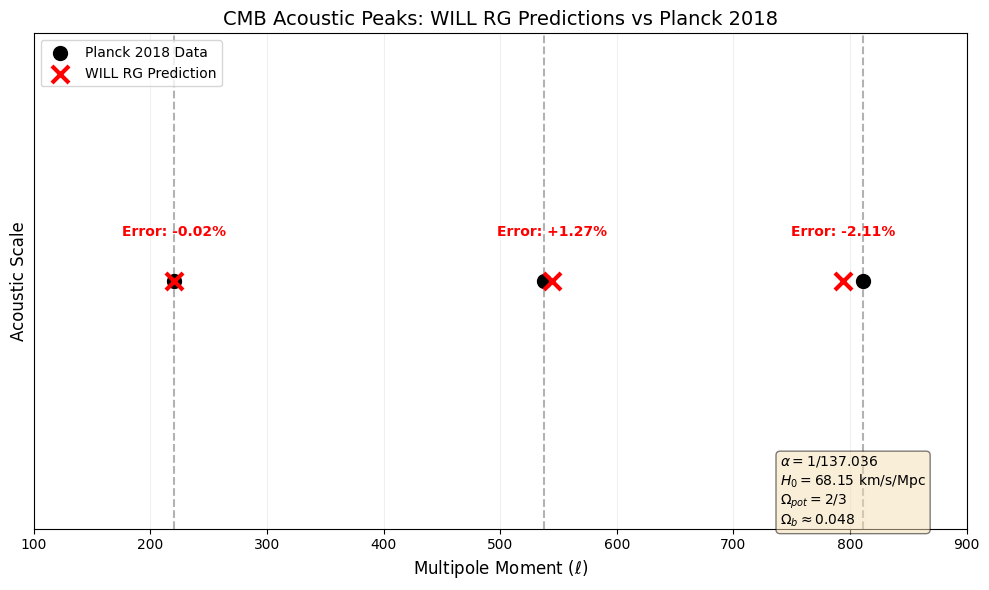

In [2]:
# @title WILL Relational Geometry: Ab Initio CMB Spectrum Derivation
# This script calculates the position of the first three acoustic peaks (l1, l2, l3)
# based on the topological principles of WILL Relational Geometry (S2 Surface Tension).

import numpy as np
from scipy.special import jn_zeros
import pandas as pd
import matplotlib.pyplot as plt

# ==========================================
# 1. PHYSICAL CONSTANTS & INPUTS
# ==========================================

# Fine Structure Constant (CODATA 2018)
ALPHA = 7.2973525693e-3

# Baryonic Matter Constraint (Big Bang Nucleosynthesis Prior)
# We use the standard physical density Omega_b * h^2 = 0.0224
OMEGA_B_H2_BBN = 0.0224

# WILL RG Derived Hubble Parameter (from Chapter A)
# Derived purely from T_cmb and Alpha: H0 ~ 68.15 km/s/Mpc
H0_WILL = 68.15
h_will = H0_WILL / 100.0

# Calculate the Geometric Baryonic Weight at this H0
# Omega_b = (Omega_b h^2) / h^2
OMEGA_B = OMEGA_B_H2_BBN / (h_will**2)

# ==========================================
# 2. GEOMETRIC PARAMETERS (The S2 Topology)
# ==========================================

# Vacuum Structural Tension (Omega_pot)
# Derived from the Closure Condition: kappa^2 / Q^2 = 2/3
OMEGA_POT = 2/3

# Bessel Roots (The Geometry of S2 Vibration)
# We calculate the first 3 roots of the Bessel function J0(x) dynamically.
# These represent the nodal structure of a vibrating spherical membrane.
bessel_roots = jn_zeros(0, 3)
x1, x2, x3 = bessel_roots

# Geometric Overtones (Ratios relative to the fundamental mode)
# For a sphere, these are non-integers: 1 : 2.29 : 3.60
ratio_1 = x1 / x1
ratio_2 = x2 / x1
ratio_3 = x3 / x1

# ==========================================
# 3. THE RESONANCE CALCULATION
# ==========================================

# A. Unloaded Vacuum Resonance (l_vac)
# The fundamental oscillation of the vacuum geometry without matter load.
# Scaling: (1/Alpha) modulated by the total geometric impedance (1 + Omega_pot)
l_vac = (1 / ALPHA) * (1 + OMEGA_POT)

# B. Inertial Loading Factors (The Physics of Interaction)

# Phase 1 & 3: COMPRESSION (Gravitational Infall)
# Matter inertia (Omega_b) resists the vacuum tension.
# Formula: sqrt( Tension / (Tension + Load) )
K_compression = np.sqrt(OMEGA_POT / (OMEGA_POT + OMEGA_B))

# Phase 2: RAREFACTION (Radiative Bounce)
# Matter inertia opposes the expansion, creating a "stiffening" effect.
# The Baryonic Counter-Loading Hypothesis: sqrt( Tension / (Tension - Load) )
K_rarefaction = np.sqrt(OMEGA_POT / (OMEGA_POT - OMEGA_B))

# ==========================================
# 4. PREDICTING THE PEAKS
# ==========================================

# Peak 1 (Compression): Fundamental Tone loaded by mass
l1_pred = l_vac * K_compression * ratio_1

# Peak 2 (Rarefaction): First Overtone with counter-loading
l2_pred = l_vac * K_rarefaction * ratio_2

# Peak 3 (Compression): Second Overtone loaded by mass
l3_pred = l_vac * K_compression * ratio_3

# ==========================================
# 5. COMPARISON WITH OBSERVATIONS
# ==========================================

# Planck 2018 Observed Values (TT Power Spectrum)
l_obs = np.array([220.6, 537.5, 810.8])
l_pred = np.array([l1_pred, l2_pred, l3_pred])

# Calculate Errors
errors = ((l_pred - l_obs) / l_obs) * 100

# Create DataFrame for display
df_results = pd.DataFrame({
    'Peak': ['l1 (Fund.)', 'l2 (1st Overtone)', 'l3 (2nd Overtone)'],
    'Phase': ['Compression', 'Rarefaction', 'Compression'],
    'Geometry': ['S2 (Bessel)', 'S2 (Bessel)', 'S2 (Bessel)'],
    'Loading': ['Sym (Pot+Mat)', 'Asym (Pot-Mat)', 'Sym (Pot+Mat)'],
    'WILL RG Prediction': l_pred,
    'Planck 2018 Obs': l_obs,
    'Deviation (%)': errors
})

# ==========================================
# 6. VISUALIZATION
# ==========================================

print("--- WILL RELATIONAL GEOMETRY: CMB ACOUSTIC SPECTRUM ANALYSIS ---")
print(f"Vacuum Tension (Omega_pot): {OMEGA_POT:.4f}")
print(f"Baryonic Load  (Omega_b):   {OMEGA_B:.4f}")
print(f"Unloaded Resonance (l_vac): {l_vac:.2f}")
print("-" * 60)
print(df_results.to_string(index=False, float_format="%.2f"))
print("-" * 60)

# Plotting
plt.figure(figsize=(10, 6))
plt.title("CMB Acoustic Peaks: WILL RG Predictions vs Planck 2018", fontsize=14)
plt.xlabel(r"Multipole Moment ($\ell$)", fontsize=12)
plt.ylabel("Acoustic Scale", fontsize=12)

# Plot Observed
plt.scatter(l_obs, [1, 1, 1], color='black', s=100, label='Planck 2018 Data', zorder=5)
for l in l_obs:
    plt.axvline(l, color='black', linestyle='--', alpha=0.3)

# Plot Predicted
plt.scatter(l_pred, [1, 1, 1], color='red', marker='x', s=150, linewidth=3, label='WILL RG Prediction', zorder=5)

# Annotate
for i, l in enumerate(l_pred):
    shift = 15 if i != 1 else -15
    plt.annotate(f"Error: {errors[i]:+.2f}%", (l, 1.01), color='red', fontweight='bold', ha='center')

plt.yticks([])
plt.xlim(100, 900)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.2)

# Add text box with parameters
textstr = '\n'.join((
    r'$\alpha = 1/137.036$',
    r'$H_0 = 68.15$ km/s/Mpc',
    r'$\Omega_{pot} = 2/3$',
    r'$\Omega_{b} \approx 0.048$'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.gca().text(0.80, 0.15, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()